In [22]:
import pandas as pd
datos = pd.read_csv("lotohistorial-google.csv")

In [23]:
datos.head()

,fecha,dia-de-la-semana,posicion-1,posicion-2,posicion-3,posicion-4,posicion-5,posicion-6,premio,ganador
0,21/10/2023,sabado,4,27,23,36,13,1,500000,False
1,28/10/2023,sabado,19,30,12,8,3,17,533000,False
2,31/10/2023,martes,35,28,4,20,1,25,533000,False
3,4/11/2023,sabado,23,32,16,11,31,4,594131,False
4,7/11/2023,martes,9,3,18,11,33,27,594131,False


In [24]:
# Colocamos la columna ganador con 1 y 0
dummies_gandor = pd.get_dummies(data=datos["ganador"], columns=["ganador"], dtype=int, drop_first=True)
datos["ganador"] = dummies_gandor

In [ ]:
# Media, desviación estándar y suma de las posiciones
datos['media_posiciones'] = datos.loc[:, "posicion-1":"posicion-6"].mean(axis=1)
datos['desviacion_posiciones'] = datos.loc[:, "posicion-1":"posicion-6"].std(axis=1)
datos['suma_posiciones'] = datos.loc[:, "posicion-1":"posicion-6"].sum(axis=1)

# Frecuencia histórica de cada número
frecuencia_historica = datos.loc[:, "posicion-1":"posicion-6"].stack().value_counts()
frecuencia_dict = frecuencia_historica.to_dict()

datos['frecuencia_historica'] = datos.loc[:, "posicion-1":"posicion-6"].apply(
    lambda fila: sum(frecuencia_dict.get(numero, 0) for numero in fila), axis=1
)

# Posición más alta y más baja
datos['posicion_mas_alta'] = datos.loc[:, "posicion-1":"posicion-6"].max(axis=1)
datos['posicion_mas_baja'] = datos.loc[:, "posicion-1":"posicion-6"].min(axis=1)

# # Diferencia entre números consecutivos
# for i in range(1, 6):  # Iterar de la primera posición a la penúltima
#     datos[f'diferencia_posicion_{i}_{i+1}'] = datos[f'posicion-{i+1}'] - datos[f'posicion-{i}']

# # Rango (número más alto menos el más bajo)
# datos['rango_posiciones'] = datos['posicion_mas_alta'] - datos['posicion_mas_baja']

# # Mediana de las posiciones
# datos['mediana_posiciones'] = datos.loc[:, "posicion-1":"posicion-6"].median(axis=1)

# # Número de ocurrencias (frecuencia relativa) de cada número dentro de cada combinación
# # Este valor es la suma de frecuencias de cada número dividido entre el total de posiciones
# datos['frecuencia_media'] = datos.loc[:, "posicion-1":"posicion-6"].apply(
#     lambda fila: sum(frecuencia_dict.get(numero, 0) for numero in fila) / 6, axis=1
# )

# # Posiciones pares vs impares
# datos['suma_pares'] = datos.loc[:, ["posicion-1", "posicion-3", "posicion-5"]].sum(axis=1)
# datos['suma_impares'] = datos.loc[:, ["posicion-2", "posicion-4", "posicion-6"]].sum(axis=1)
# datos['diferencia_pares_impares'] = datos['suma_pares'] - datos['suma_impares']


In [26]:
datos = datos.drop(columns="dia-de-la-semana")
datos = datos.drop(columns="fecha")
daatos = datos.drop(columns="premio")

In [27]:
datos.head()

,posicion-1,posicion-2,posicion-3,posicion-4,posicion-5,posicion-6,premio,ganador,media_posiciones,desviacion_posiciones,suma_posiciones,frecuencia_historica,posicion_mas_alta,posicion_mas_baja
0,4,27,23,36,13,1,500000,0,17.333333,13.691847,104,124,36,1
1,19,30,12,8,3,17,533000,0,14.833333,9.453394,89,109,30,3
2,35,28,4,20,1,25,533000,0,18.833333,13.585532,113,132,35,1
3,23,32,16,11,31,4,594131,0,19.500000,11.184811,117,121,32,4
4,9,3,18,11,33,27,594131,0,16.833333,11.426577,101,130,33,3


In [28]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   posicion-1             118 non-null    int64  
 1   posicion-2             118 non-null    int64  
 2   posicion-3             118 non-null    int64  
 3   posicion-4             118 non-null    int64  
 4   posicion-5             118 non-null    int64  
 5   posicion-6             118 non-null    int64  
 6   premio                 118 non-null    int64  
 7   ganador                118 non-null    int64  
 8   media_posiciones       118 non-null    float64
 9   desviacion_posiciones  118 non-null    float64
 10  suma_posiciones        118 non-null    int64  
 11  frecuencia_historica   118 non-null    int64  
 12  posicion_mas_alta      118 non-null    int64  
 13  posicion_mas_baja      118 non-null    int64  
dtypes: float64(2), int64(12)
memory usage: 13.0 KB


In [29]:
datos.describe()

,posicion-1,posicion-2,posicion-3,posicion-4,posicion-5,posicion-6,premio,ganador,media_posiciones,desviacion_posiciones,suma_posiciones,frecuencia_historica,posicion_mas_alta,posicion_mas_baja
count,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000
mean,18.822034,20.601695,17.584746,18.703390,19.525424,19.245763,660220.550847,0.067797,19.080508,10.897441,114.483051,118.338983,32.830508,5.016949
std,11.316451,10.061469,11.337349,10.917961,11.573409,10.929406,117690.927129,0.252469,4.315641,2.229884,25.893844,10.227515,4.559774,3.802795
min,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,500000.000000,0.000000,9.833333,4.718757,59.000000,96.000000,15.000000,1.000000
25%,8.000000,13.250000,8.000000,10.000000,9.250000,9.250000,558087.000000,0.000000,16.041667,9.511379,96.250000,111.000000,30.000000,2.000000
50%,19.500000,20.000000,17.000000,18.000000,18.500000,21.000000,650421.000000,0.000000,19.083333,10.978766,114.500000,118.500000,34.000000,4.000000
75%,29.000000,29.750000,27.000000,28.000000,30.000000,28.000000,742911.500000,0.000000,22.166667,12.542926,133.000000,125.000000,36.000000,7.000000
max,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,932730.000000,1.000000,28.166667,15.504838,169.000000,140.000000,38.000000,19.000000


array([[<Axes: title={'center': 'posicion-1'}>,
        <Axes: title={'center': 'posicion-2'}>,
        <Axes: title={'center': 'posicion-3'}>,
        <Axes: title={'center': 'posicion-4'}>],
       [<Axes: title={'center': 'posicion-5'}>,
        <Axes: title={'center': 'posicion-6'}>,
        <Axes: title={'center': 'premio'}>,
        <Axes: title={'center': 'ganador'}>],
       [<Axes: title={'center': 'media_posiciones'}>,
        <Axes: title={'center': 'desviacion_posiciones'}>,
        <Axes: title={'center': 'suma_posiciones'}>,
        <Axes: title={'center': 'frecuencia_historica'}>],
       [<Axes: title={'center': 'posicion_mas_alta'}>,
        <Axes: title={'center': 'posicion_mas_baja'}>, <Axes: >,
        <Axes: >]], dtype=object)

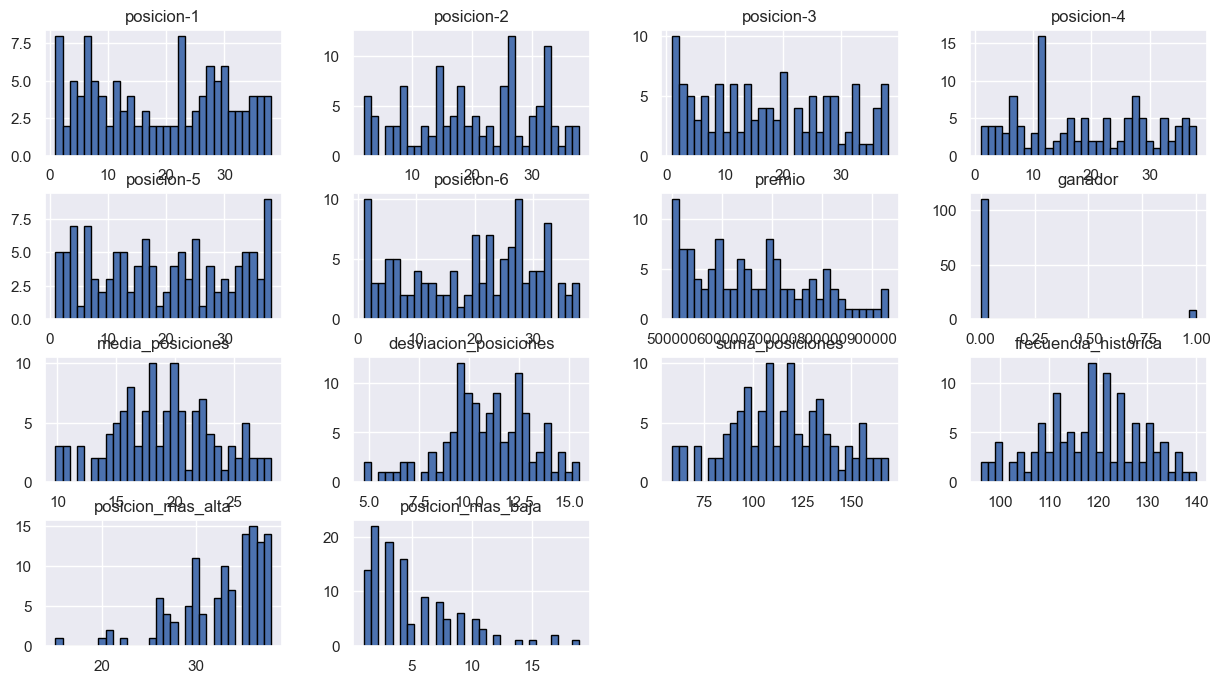

In [30]:
datos.hist(figsize=(15,8), bins=30, edgecolor="black")

<Axes: >

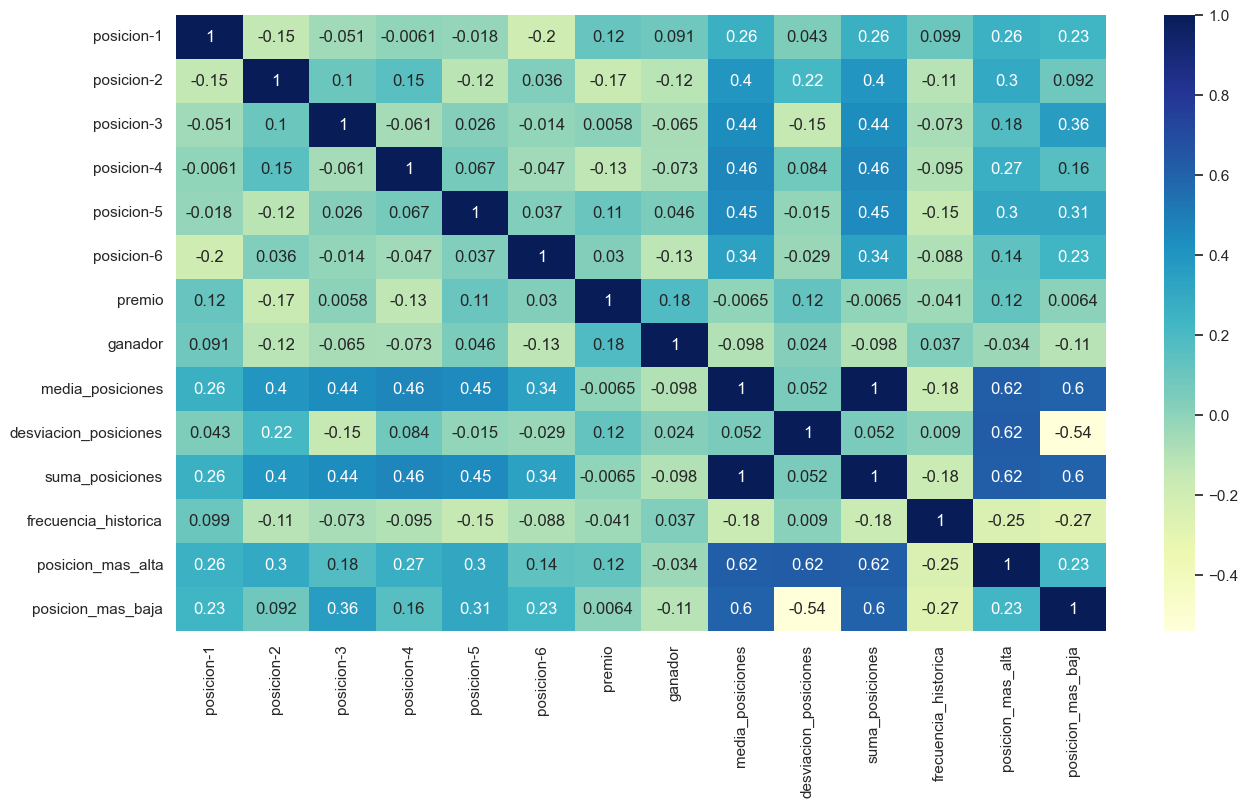

In [31]:
import seaborn as sb
sb.set_theme(rc={'figure.figsize':(15,8)})
sb.heatmap(datos.corr(), annot=True, cmap="YlGnBu")


In [32]:
datos.corr()["ganador"].sort_values(ascending=False)

ganador                  1.000000
premio                   0.182644
posicion-1               0.091014
posicion-5               0.046207
frecuencia_historica     0.037364
desviacion_posiciones    0.024095
posicion_mas_alta       -0.034480
posicion-3              -0.064731
posicion-4              -0.073262
media_posiciones        -0.097878
suma_posiciones         -0.097878
posicion_mas_baja       -0.108035
posicion-2              -0.117137
posicion-6              -0.126892
Name: ganador, dtype: float64

In [33]:
datos.head()

,posicion-1,posicion-2,posicion-3,posicion-4,posicion-5,posicion-6,premio,ganador,media_posiciones,desviacion_posiciones,suma_posiciones,frecuencia_historica,posicion_mas_alta,posicion_mas_baja
0,4,27,23,36,13,1,500000,0,17.333333,13.691847,104,124,36,1
1,19,30,12,8,3,17,533000,0,14.833333,9.453394,89,109,30,3
2,35,28,4,20,1,25,533000,0,18.833333,13.585532,113,132,35,1
3,23,32,16,11,31,4,594131,0,19.500000,11.184811,117,121,32,4
4,9,3,18,11,33,27,594131,0,16.833333,11.426577,101,130,33,3


### Numero ganadores

<Axes: xlabel='numero', ylabel='count'>

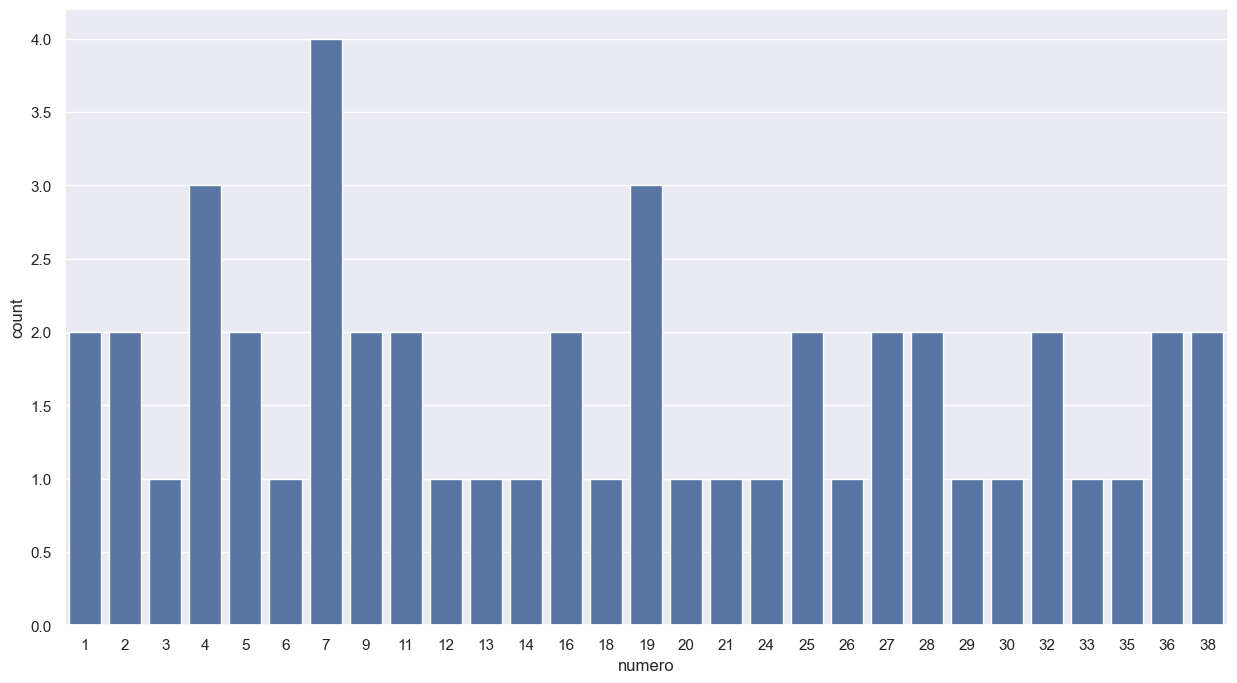

In [34]:
# Filtrar los datos donde "True" es 1 (ganador)
ganadores = datos[datos["ganador"] == 1]  # Cambia 'True' si ya renombraste la columna

# Seleccionar las columnas de las posiciones
numeros_ganadores = ganadores.loc[:, "posicion-1":"posicion-6"]

# Convertir los datos de las posiciones en un formato largo para contar las frecuencias
numeros_ganadores_melted = numeros_ganadores.melt(var_name="posicion", value_name="numero")

# Ver la gráfica de conteo de números ganadores
sb.countplot(x="numero", data=numeros_ganadores_melted)


# Empezamos el entrenamiento

In [35]:
X = datos.drop(columns="ganador")
y = datos["ganador"]

In [36]:
from sklearn.model_selection import train_test_split
X_ent, X_pru, y_ent, y_pru = train_test_split(X, y, test_size=.2)

In [37]:
from sklearn.linear_model import LogisticRegression

# nos dara un error de que llego al limite de darle la vuelta a los datos, y debemos colocarle el valor maximo de iteraciones
modelo = LogisticRegression(max_iter=10000)
modelo.fit(X_ent, y_ent)

LogisticRegression(max_iter=10000)

In [38]:
predicciones = modelo.predict(X_pru)

In [39]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pru, predicciones)

0.8333333333333334

In [40]:
from sklearn.metrics import classification_report

print(classification_report(y_pru, predicciones))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91        22
           1       0.00      0.00      0.00         2

    accuracy                           0.83        24
   macro avg       0.45      0.45      0.45        24
weighted avg       0.83      0.83      0.83        24



In [41]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_pru, predicciones)

array([[20,  2],
       [ 2,  0]])

In [42]:
pd.DataFrame(confusion_matrix(y_pru, predicciones), columns=["Pred: No", "Pred: Si"], index=["Real: No", "Real: Si"])

,Pred: No,Pred: Si
Real: No,20,2
Real: Si,2,0
